Import modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

(30471, 292)

Import training data

In [21]:
train_df = pd.read_csv("../input/train.csv")
train_df.shape

(30471, 292)

In [84]:
pd.set_option('display.max_columns', None)
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

A few plots of the dataset

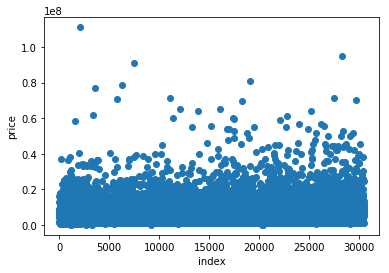

In [6]:
plt.figure()
plt.scatter(range(train_df.shape[0]),train_df.price_doc.values)
plt.xlabel('index')
plt.ylabel('price')
plt.show()

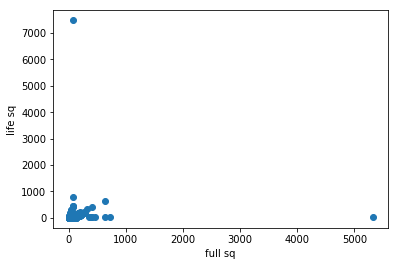

In [44]:
plt.figure()
plt.scatter(train_df.full_sq.values, train_df.life_sq.values)
plt.xlabel('full sq')
plt.ylabel('life sq')
plt.show()

Are those outliers?  Let's remove them for now.

In [33]:
train_df2 = train_df[(train_df['full_sq']<1000) & (train_df['life_sq']<1000)]

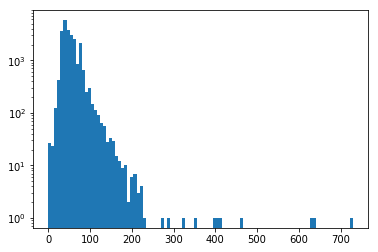

In [43]:
plt.figure()
plt.hist(train_df2['full_sq'],bins=100)
plt.yscale('log')
plt.show()

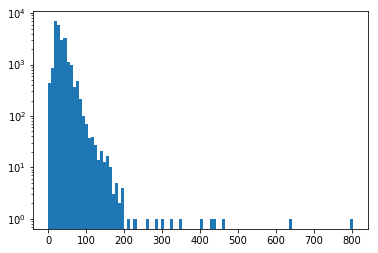

In [42]:
plt.figure()
plt.hist(train_df2['life_sq'],bins=100)
plt.yscale('log')
plt.show()

Check the price distribution.

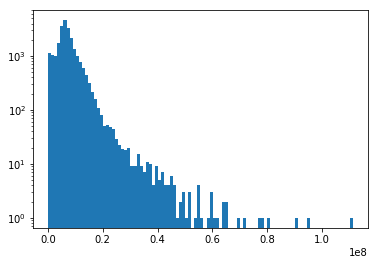

In [41]:
plt.figure()
plt.hist(train_df2['price_doc'],bins=100)
plt.yscale('log')
plt.show()

Let's see how the price correlates with full & life sq.

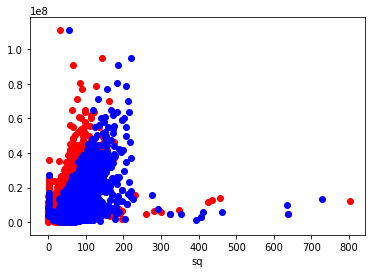

In [56]:
plt.figure()
plt.scatter(train_df2['life_sq'],train_df2['price_doc'],color='r')
plt.scatter(train_df2['full_sq'],train_df2['price_doc'],color='b')
plt.xlabel('sq')
plt.show()

Looks like full_sq is a better feature -- more highly correlated.
Also, should separate very large and very small properties into their own classes.

Is (full - life sq) a feature?

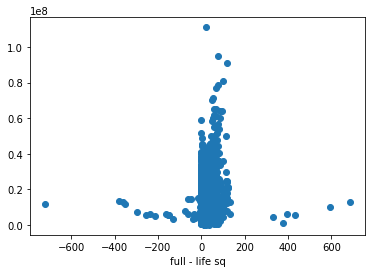

In [57]:
plt.figure()
plt.scatter(train_df2['full_sq'] - train_df2['life_sq'],train_df2['price_doc'])
plt.xlabel('full - life sq')
plt.show()

This is interesting -- what are these properties with more life than full sq!?

Let's remove these properties.

In [69]:
train_df3 = train_df2[train_df2['full_sq'] > train_df2['life_sq']]

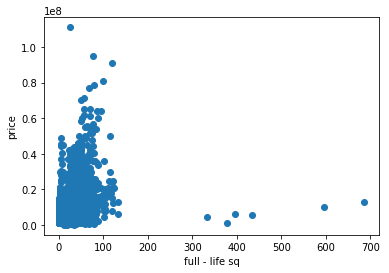

In [71]:
plt.figure()
plt.scatter(train_df3['full_sq'] - train_df3['life_sq'],train_df3['price_doc'])
plt.xlabel('full - life sq')
plt.ylabel('price')
plt.show()

Back to original plot...

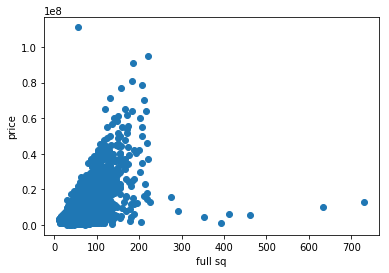

In [75]:
plt.figure()
plt.scatter(train_df3['full_sq'],train_df3['price_doc'])
plt.xlabel('full sq')
plt.ylabel('price')
plt.show()

Look at price vs. distance to kremlin.

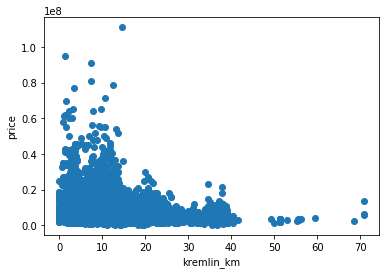

In [85]:
plt.figure()
plt.scatter(train_df3['kremlin_km'],train_df3['price_doc'])
plt.xlabel('kremlin_km')
plt.ylabel('price')
plt.show()

Look at sub area.

In [87]:
plt.figure()
plt.bar(train_df3['sub_area'],train_df3['price_doc'])
plt.xlabel('kremlin_km')
plt.ylabel('price')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'